In [1]:
#%matplotlib ipympl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
PWRGenfp = '.\Data\PWRGeneration\ELECGEN_20220518-052640.csv'
PWRGen = pd.read_csv(PWRGenfp, encoding = "ISO-8859-1")

In [3]:
PWRGen = PWRGen[PWRGen.Technology == "Solar photovoltaic"]
PWRGen.head()

,Country,Technology,Grid connection,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,Solar photovoltaic,On-grid,..,..,..,..,..,..,..,...,..,..,..,..,..,..,2.992,2.263,2.263,15.578
4,Albania,Solar photovoltaic,On-grid,..,0.136,0.272,0.272,0.272,0.272,0.272,...,0.544,0.767,0.924,1.03,1.188,1.428,1.36,1.2,1.334,22.196
8,Algeria,Solar photovoltaic,On-grid,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
12,American Samoa,Solar photovoltaic,On-grid,..,..,..,..,..,..,..,...,..,0.267,1.409,2.419,2.363,2.494,3.125,3.735,3.735,3.735
16,Andorra,Solar photovoltaic,On-grid,..,..,..,..,..,..,..,...,..,..,..,..,0.199,0.242,0.261,0.508,0.561,0.723


In [4]:
PWRGen.columns

Index(['Country', 'Technology', 'Grid connection', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [5]:
Popfp = '.\Data\PopAndGDP\Population.csv'
Pop = pd.read_csv(Popfp, encoding = "utf-8")
GDPfp = '.\Data\PopAndGDP\GDPPerCapita.csv'
GDP = pd.read_csv(GDPfp, encoding = "utf-8")


In [6]:
Pop.head()

,Country,Country Code,1990,2000,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,12412311,20779957,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,..
1,Albania,ALB,3286542,3089027,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,..
2,Algeria,DZA,25758872,31042238,37383899,38140135,38923688,39728020,40551398,41389174,42228415,43053054,43851043,..
3,American Samoa,ASM,47351,57816,55669,55717,55791,55806,55739,55617,55461,55312,55197,..
4,Andorra,AND,54508,65390,82427,80770,79213,77993,77295,76997,77008,77146,77265,..


In [7]:
GDP.head()

,Country,Country Code,1990,2000,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,..,..,638.8458516,624.3154545,614.2233424,556.0072209,512.0127781,516.6798622,485.6684187,494.1793499,516.7478708,..
1,Albania,ALB,617.2304355,1126.68334,4247.630047,4413.062005,4578.633208,3952.802538,4124.05539,4531.019374,5287.663694,5395.659532,5246.096346,..
2,Algeria,DZA,2408.822985,1765.027146,5592.220115,5499.587331,5493.056695,4177.889542,3946.452447,4109.698217,4142.018558,3989.668276,3306.858208,..
3,American Samoa,ASM,..,..,11496.5241,11450.7242,11525.15639,12059.63516,12038.2497,11003.82976,11521.60978,11715.36014,12844.90099,..
4,Andorra,AND,18878.85231,21854.2468,38686.46126,39540.72481,41303.92937,35770.7767,37475.63506,38964.90448,41791.96984,40897.33087,..,..


In [8]:
df = pd.merge(PWRGen[["Country","2012"]], GDP[["Country","2012"]], on=["Country"], how='inner')
df = pd.merge(df, Pop[["Country","2012"]], on=["Country"], how='inner')
df.to_csv("./join_nodrop.csv")
df = df.drop_duplicates()
df.rename(columns={"2012_x":"PWRGen", "2012_y":"GDP", "2012":"Pop"}, inplace=True)
df[["PWRGen", "GDP", "Pop"]] = df[["PWRGen", "GDP", "Pop"]].apply(pd.to_numeric, errors='coerce')
df = df.dropna(axis=0)
df.PWRGen = df.PWRGen/df.Pop
df


,Country,PWRGen,GDP,Pop
1,Albania,3.185766e-07,4247.630047,2900401.0
3,American Samoa,2.531032e-05,11496.524100,55669.0
6,Antigua and Barbuda,5.231896e-06,13272.734940,90407.0
7,Argentina,1.931313e-07,13082.664330,41733271.0
9,Aruba,1.112465e-05,24712.493260,102565.0
...,...,...,...,...
166,Tuvalu,5.119136e-06,3506.308144,10744.0
168,Ukraine,7.310278e-06,4004.804396,45593342.0
169,United Arab Emirates,2.034655e-06,40976.490750,9141598.0
170,Uruguay,2.515556e-08,15171.580170,3378975.0


In [9]:
years = ["2000","2012","2013","2014","2015","2016","2017","2018","2019"]
dfs = []
for year in years:
    df = pd.merge(PWRGen[["Country",year]], GDP[["Country",year]], on=["Country"], how='inner')
    df = pd.merge(df, Pop[["Country",year]], on=["Country"], how='inner')
    df = df.drop_duplicates()
    df.rename(columns={year+'_x':"PWRGen", year+'_y':"GDP", year:"Pop"}, inplace=True)
    df[["PWRGen", "GDP", "Pop"]] = df[["PWRGen", "GDP", "Pop"]].apply(pd.to_numeric, errors='coerce')
    df = df.dropna(axis=0)
    df.PWRGen = df.PWRGen/df.Pop
    dfs.append(df)
    print(year, df.shape)
    

2000 (23, 4)
2012 (98, 4)
2013 (109, 4)
2014 (122, 4)
2015 (125, 4)
2016 (131, 4)
2017 (134, 4)
2018 (138, 4)
2019 (138, 4)


In [22]:
PWRGen[PWRGen["Country"] == "Philippines"][years].squeeze()

2000         NaN
2012       1.320
2013       1.414
2014      16.517
2015     138.534
2016    1097.016
2017    1201.152
2018    1249.116
2019    1246.000
Name: 616, dtype: float64

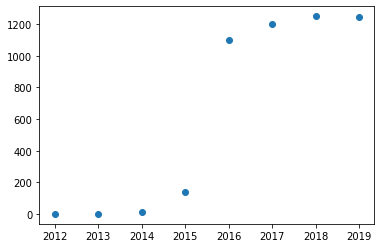

In [16]:
PWRGen[years] = PWRGen[years].apply(pd.to_numeric, errors='coerce')
plt.scatter(years,np.array(PWRGen[PWRGen["Country"] == "Philippines"][years].squeeze()))

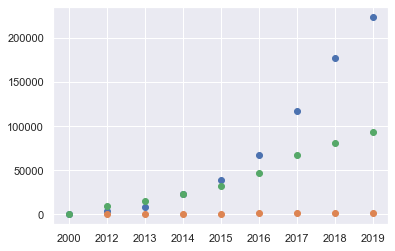

In [21]:
PWRGen[years] = PWRGen[years].apply(pd.to_numeric, errors='coerce')
for index,row in PWRGen.iterrows():
    #print(list(row[years]))
    if row["Country"] in ["Philippines", "China", "United States of America"]:
        plt.scatter(years, list(row[years]))

In [ ]:
#fig, ax = plt.subplots()
#ax.set_xlabel("GDP Per Capita")
#ax.set_ylabel("Population")

#for i in range(len(dfs)):
#    ax.cla()
#    ax.scatter(dfs[i].GDP,  dfs[i].PWRGen)
#    ax.set_title("frame {}".format(i))
#    plt.pause(0.1)

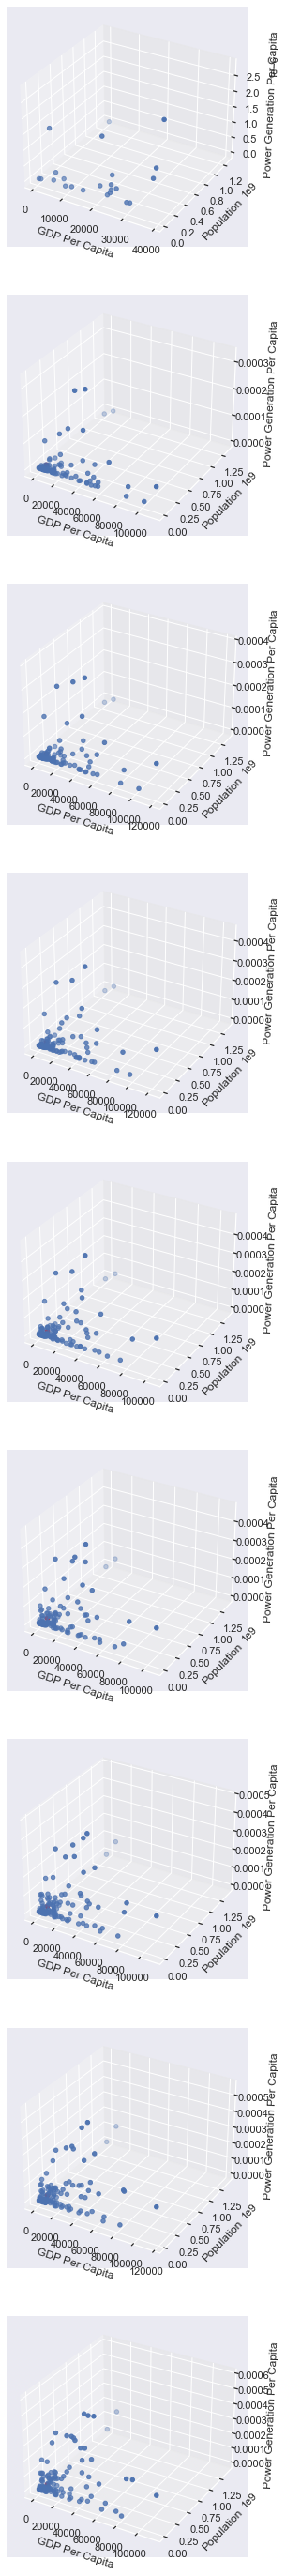

In [18]:
sns.set(style = "darkgrid")
# fig = plt.figure()
fig, ax = plt.subplots(9,1,figsize=(10,50), subplot_kw={'projection': '3d'})
#fig, ax = plt.subplots(len(years),1,figsize=(10,50))
for i in range(len(years)):
    #ax[i] = fig.add_subplot(1, i+1, 1, projection='3d')
    ax[i].scatter(dfs[i].GDP, dfs[i].Pop, dfs[i].PWRGen)
    #ax[i].scatter(dfs[i].GDP, dfs[i].PWRGen)
    ax[i].scatter(dfs[i][dfs[i]["Country"] == "Philippines"].GDP, dfs[i][dfs[i]["Country"] == "Philippines"].Pop, dfs[i][dfs[i]["Country"] == "Philippines"].PWRGen, color="red")
    ax[i].set_xlabel("GDP Per Capita")
    ax[i].set_zlabel("Power Generation Per Capita")
    ax[i].set_ylabel("Population")



In [ ]:
sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.GDP, df.PWRGen, df.Pop)
